In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [3]:
character_1best_files = []
token_1best_files = []
node_1best_files = []

character_2mid_files = []
token_2mid_files = []
node_2mid_files = []

character_3mid_files = []
token_3mid_files = []
node_3mid_files = []

character_4worst_files = []
token_4worst_files = []
node_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
node_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
node_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"


character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
node_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"


character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
node_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"


for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_1best_file_path):
    for filename in filenames:
        node_1best_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_2mid_file_path):
    for filename in filenames:
        node_2mid_files.append(os.path.join(parent, filename))        
  


for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_3mid_file_path):
    for filename in filenames:
        node_3mid_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(node_4worst_file_path):
    for filename in filenames:
        node_4worst_files.append(os.path.join(parent, filename))        

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[int(num) for num in line.split(',') if num != "\n"][:154] for line in f ]
        matrixList.append(np.array(matrix))

In [5]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 2000)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 2000)
random.seed(100)
node_1best_files = random.sample(node_1best_files, k= 2000)

random.seed(100)
character_2mid_files = random.sample(character_2mid_files, k = 2000)
random.seed(100)
token_2mid_files = random.sample(token_2mid_files, k= 2000)
random.seed(100)
node_2mid_files = random.sample(node_2mid_files, k= 2000)

random.seed(100)
character_3mid_files = random.sample(character_3mid_files, k = 2000)
random.seed(100)
token_3mid_files = random.sample(token_3mid_files, k= 2000)
random.seed(100)
node_3mid_files = random.sample(node_3mid_files, k= 2000)

In [6]:
#best1_input_chars = []
#matrixFileToMatrix(character_1best_files[1:2], best1_input_chars)

In [7]:
#len(best1_input_chars[0])

In [6]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)
matrixFileToMatrix(node_1best_files, best1_input_nodes)

print("done")

matrixFileToMatrix(character_2mid_files, mid2_input_chars)
matrixFileToMatrix(token_2mid_files, mid2_input_tokens)
matrixFileToMatrix(node_2mid_files, mid2_input_nodes)

print("done")

matrixFileToMatrix(character_3mid_files, mid3_input_chars)
matrixFileToMatrix(token_3mid_files, mid3_input_tokens)
matrixFileToMatrix(node_3mid_files, mid3_input_nodes)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)
matrixFileToMatrix(node_4worst_files, worst4_input_nodes)

done
done
done


# Stacked Matrices

In [7]:
best1_input_stack = []
mid2_input_stack = []
mid3_input_stack = []
worst4_input_stack = []

print(np.array(best1_input_tokens[0]).shape)

for char_array, token_array, node_array in zip(best1_input_chars, best1_input_tokens, best1_input_nodes):
    best1_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)],axis=-1))
    
      
for char_array, token_array, node_array in zip(mid2_input_chars, mid2_input_tokens, mid2_input_nodes):
    mid2_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)], axis=-1))

for char_array, token_array, node_array in zip(mid3_input_chars, mid3_input_tokens, mid3_input_nodes):
    mid3_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)],axis=-1))
    
      
for char_array, token_array, node_array in zip(worst4_input_chars, worst4_input_tokens, worst4_input_nodes):
    worst4_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)], axis=-1))

(496, 154)


In [8]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

In [9]:
input4stack_x = []
input4stack_y = []

for x in best1_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,0,0,1])

for x in mid2_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,0,1,0])
    
for x in mid3_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,1,0,0])

for x in worst4_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([1,0,0,0])

In [10]:
best1_input_stack = []
mid2_input_stack = []
mid3_input_stack = []
worst4_input_stack = []

In [11]:
input4stack_x = np.array(input4stack_x)
input4stack_y = np.array(input4stack_y)

In [12]:
print(input4stack_x.shape)
print(input4stack_y.shape)

(7076, 496, 154, 3)
(7076, 4)


In [13]:
input4stack_x, input4stack_y = shuffle(input4stack_x, input4stack_y, random_state=0)

In [14]:
x_train4s, x_test4s, y_train4s, y_test4s = train_test_split(input4stack_x, input4stack_y, test_size = 0.2, random_state=24)

In [15]:
input4stack_x = []
input4stack_y = []

In [16]:
batch_size = 64
epochs = 6

model4s = Sequential()
model4s.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,3)))
model4s.add(Conv2D(64, (6, 6), strides=(2,2), activation='relu'))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Dropout(0.25))
model4s.add(Flatten())
model4s.add(Dense(128, activation='relu'))
model4s.add(Dropout(0.5))
model4s.add(Dense(4, activation='softmax'))

print(model4s.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 75, 32)       3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 35, 64)       73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 17, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 17, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65280)             0         
                                                                 
 dense (Dense)               (None, 128)               8355968   
                                                        

In [17]:
model4s.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model4s.fit(x_train4s, y_train4s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test4s, y_test4s))
score4s = model4s.evaluate(x_test4s, y_test4s, verbose=0)
print('Test loss:', score4s[0])
print('Test accuracy:', score4s[1])

Epoch 1/6
89/89 [==============================] - 185s 2s/step - loss: 3.4598 - accuracy: 0.4832 - val_loss: 0.6310 - val_accuracy: 0.7592
Epoch 2/6
89/89 [==============================] - 184s 2s/step - loss: 0.6696 - accuracy: 0.7422 - val_loss: 0.6442 - val_accuracy: 0.7754
Epoch 3/6
89/89 [==============================] - 158s 2s/step - loss: 0.6035 - accuracy: 0.7650 - val_loss: 0.6326 - val_accuracy: 0.7564
Epoch 4/6
89/89 [==============================] - 160s 2s/step - loss: 0.5592 - accuracy: 0.7829 - val_loss: 0.5683 - val_accuracy: 0.7888
Epoch 5/6
89/89 [==============================] - 159s 2s/step - loss: 0.4943 - accuracy: 0.8087 - val_loss: 0.5928 - val_accuracy: 0.7754
Epoch 6/6
89/89 [==============================] - 155s 2s/step - loss: 0.4512 - accuracy: 0.8212 - val_loss: 0.5913 - val_accuracy: 0.7677
Test loss: 0.5912607312202454
Test accuracy: 0.7676553726196289


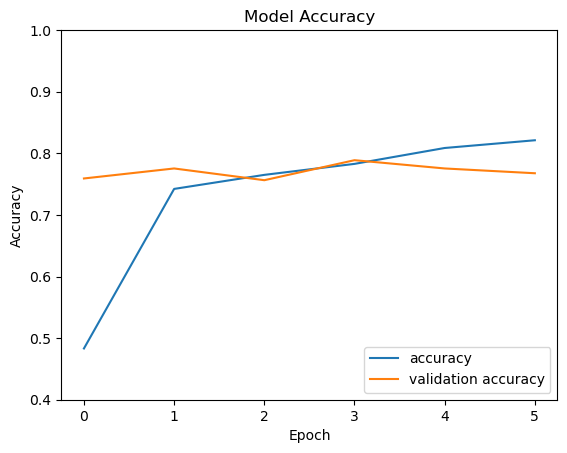

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

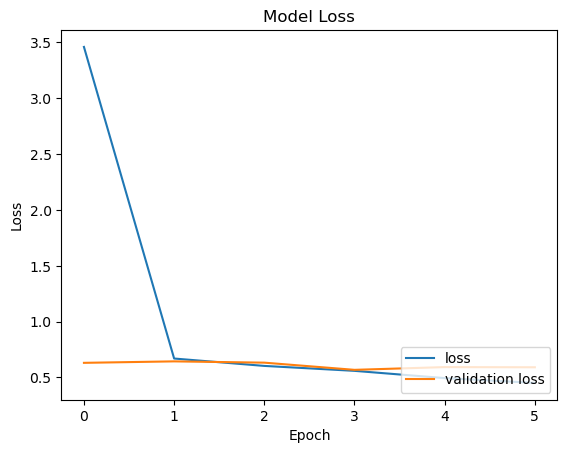

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [24]:
new_predict4 = model4s.predict(x_test4s)

45/45 [==============================] - 6s 142ms/step


In [25]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_test4s, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[173  42   1   0]
 [ 48 281  52   2]
 [  5  55 307  39]
 [  0  16  69 326]]


In [27]:
onemisclass = 48+55+69+42+52+39
twomisclass = 5+16+1+2
threemisclass =  0+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[305, 24, 0]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

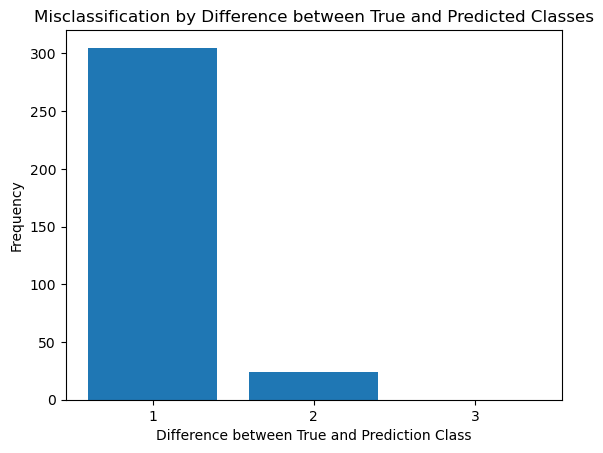

In [28]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4s.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\stack4ClassModel")

# Single Models

In [7]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,0,1])

for x in mid2_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,1,0])
    
for x in mid3_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0,0,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,0,1])

for x in mid2_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,1,0])

for x in mid3_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0,0,0])
    
    
    
    
    
for x in best1_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,0,0,1])

for x in mid2_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,0,1,0])

for x in mid3_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,1,0,0])

for x in worst4_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([1,0,0,0])

In [8]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

In [9]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

input4_nodes_x = np.array(input4_nodes_x)
input4_nodes_y = np.array(input4_nodes_y)

In [10]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

print(input4_nodes_x.shape)
print(input4_nodes_y.shape)

(7076, 496, 154)
(7076, 4)
(7076, 496, 154)
(7076, 4)
(7076, 496, 154)
(7076, 4)


In [11]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

input4_nodes_x, input4_nodes_y = shuffle(input4_nodes_x, input4_nodes_y, random_state=0)

In [12]:
x_characters_train, x_characters_test, y_characters_train, y_characters_test = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

x_tokens_train, x_tokens_test, y_tokens_train, y_tokens_test = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

x_nodes_train, x_nodes_test, y_nodes_train, y_nodes_test = train_test_split(
    input4_nodes_x, input4_nodes_y, test_size = 0.2, random_state=24)

In [13]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

In [28]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,1)))
model4.add(Conv2D(64, (6, 6), strides=(2,2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 246, 75, 32)       1184      
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 35, 64)       73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 17, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 60, 17, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 65280)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                4177984   
                                                      

In [29]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Character Model

In [16]:
character_fit = model4.fit(x_characters_train, y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test, y_characters_test))
character_score = model4.evaluate(x_characters_test, y_characters_test, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
89/89 [==============================] - 128s 1s/step - loss: 1.4428 - accuracy: 0.6735 - val_loss: 0.6096 - val_accuracy: 0.7648
Epoch 2/6
89/89 [==============================] - 123s 1s/step - loss: 0.6989 - accuracy: 0.7177 - val_loss: 0.5950 - val_accuracy: 0.7698
Epoch 3/6
89/89 [==============================] - 126s 1s/step - loss: 0.6604 - accuracy: 0.7345 - val_loss: 0.6004 - val_accuracy: 0.7564
Epoch 4/6
89/89 [==============================] - 121s 1s/step - loss: 0.6211 - accuracy: 0.7475 - val_loss: 0.6063 - val_accuracy: 0.7669
Epoch 5/6
89/89 [==============================] - 114s 1s/step - loss: 0.5815 - accuracy: 0.7629 - val_loss: 0.6145 - val_accuracy: 0.7599
Epoch 6/6
89/89 [==============================] - 126s 1s/step - loss: 0.5352 - accuracy: 0.7765 - val_loss: 0.6326 - val_accuracy: 0.7677
Test loss: 0.6326369643211365
Test accuracy: 0.7676553726196289


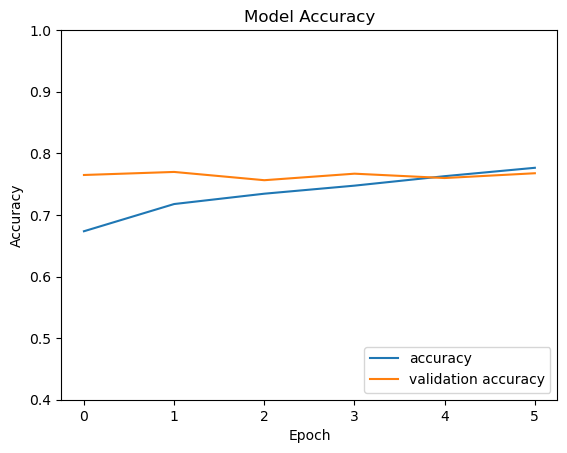

In [21]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

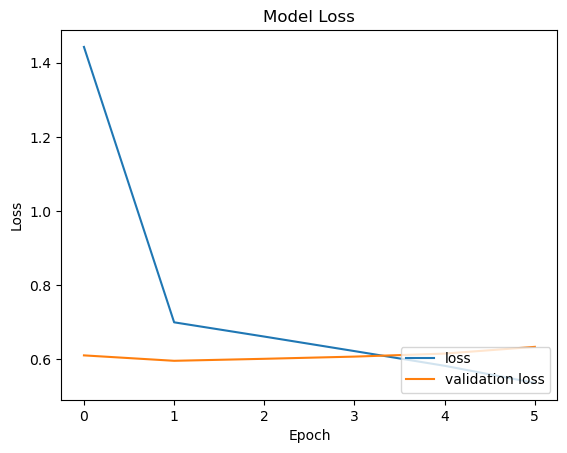

In [22]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [19]:
new_predict4 = model4.predict(x_characters_test)

45/45 [==============================] - 9s 187ms/step


In [20]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[180  36   0   0]
 [ 48 282  53   0]
 [  5  53 296  52]
 [  0  19  63 329]]


In [26]:
onemisclass = 48+53+63+36+53+52
twomisclass = 5+19+0+0
threemisclass =  0+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[305, 24, 0]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

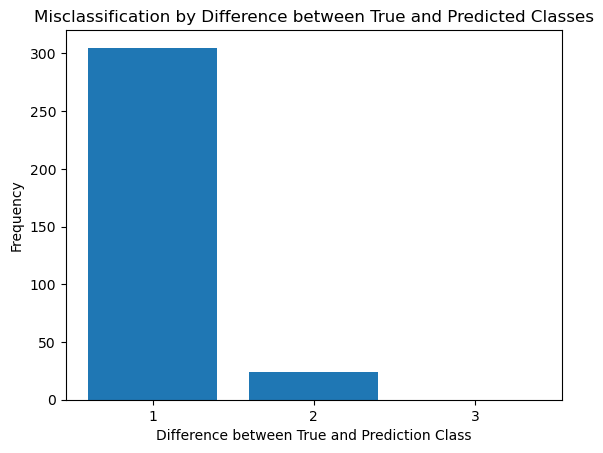

In [27]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\character4ClassModel")

# Token Model

In [30]:
token_fit = model4.fit(x_tokens_train, y_tokens_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test, y_tokens_test))
token_score = model4.evaluate(x_tokens_test, y_tokens_test, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
89/89 [==============================] - 123s 1s/step - loss: 1.0339 - accuracy: 0.6929 - val_loss: 0.5710 - val_accuracy: 0.7669
Epoch 2/6
89/89 [==============================] - 135s 2s/step - loss: 0.6327 - accuracy: 0.7519 - val_loss: 0.5709 - val_accuracy: 0.7846
Epoch 3/6
89/89 [==============================] - 142s 2s/step - loss: 0.5955 - accuracy: 0.7740 - val_loss: 0.5674 - val_accuracy: 0.7705
Epoch 4/6
89/89 [==============================] - 132s 1s/step - loss: 0.5334 - accuracy: 0.7843 - val_loss: 0.5522 - val_accuracy: 0.7719
Epoch 5/6
89/89 [==============================] - 130s 1s/step - loss: 0.4722 - accuracy: 0.8117 - val_loss: 0.5679 - val_accuracy: 0.7747
Epoch 6/6
89/89 [==============================] - 125s 1s/step - loss: 0.4168 - accuracy: 0.8279 - val_loss: 0.6197 - val_accuracy: 0.7811
Test loss: 0.6196935772895813
Test accuracy: 0.7810734510421753


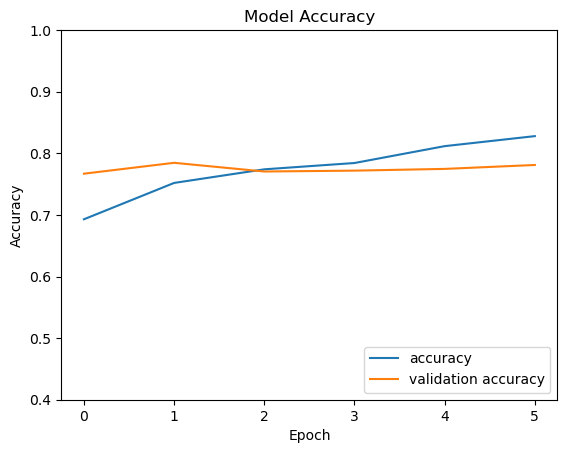

In [36]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

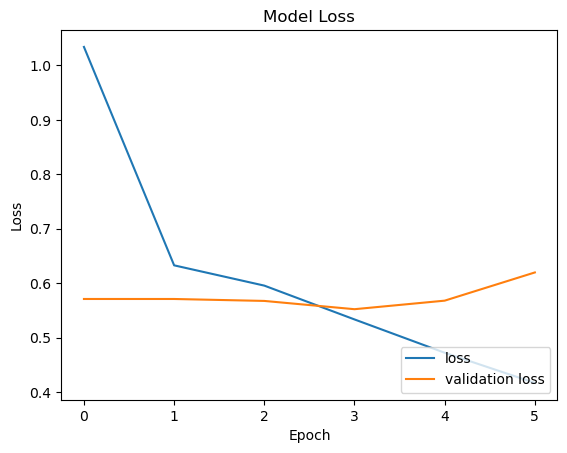

In [37]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [38]:
new_predict4 = model4.predict(x_tokens_test)

45/45 [==============================] - 5s 121ms/step


In [39]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_tokens_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[193  23   0   0]
 [ 62 270  51   0]
 [  8  47 335  16]
 [  2  13  88 308]]


In [40]:
onemisclass = 62+47+88+23+51+16
twomisclass = 8+13+0+0
threemisclass =  2+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[287, 21, 2]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

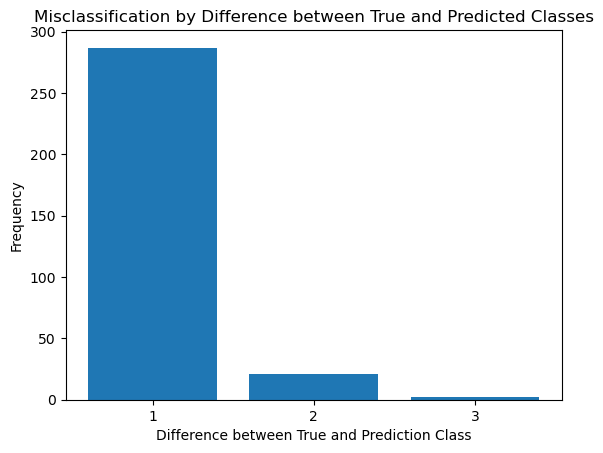

In [41]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\token4ClassModel")

# Node Model

In [42]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,1)))
model4.add(Conv2D(64, (9, 9), strides=(2,2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 244, 73, 32)       2624      
                                                                 
 conv2d_5 (Conv2D)           (None, 118, 33, 64)       165952    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 59, 16, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 60416)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                3866688   
                                                      

In [43]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
node_fit = model4.fit(x_nodes_train, y_nodes_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_nodes_test, y_nodes_test))
node_score = model4.evaluate(x_nodes_test, y_nodes_test, verbose=0)
print('Test loss:', node_score[0])
print('Test accuracy:', node_score[1])

Epoch 1/6
89/89 [==============================] - 266s 3s/step - loss: 2.9054 - accuracy: 0.4242 - val_loss: 1.1639 - val_accuracy: 0.5579
Epoch 2/6
89/89 [==============================] - 287s 3s/step - loss: 1.0020 - accuracy: 0.5793 - val_loss: 0.8824 - val_accuracy: 0.6271
Epoch 3/6
89/89 [==============================] - 232s 3s/step - loss: 0.9053 - accuracy: 0.6113 - val_loss: 0.8404 - val_accuracy: 0.6434
Epoch 4/6
89/89 [==============================] - 215s 2s/step - loss: 0.8686 - accuracy: 0.6244 - val_loss: 0.8646 - val_accuracy: 0.6264
Epoch 5/6
89/89 [==============================] - 215s 2s/step - loss: 0.8431 - accuracy: 0.6373 - val_loss: 0.8329 - val_accuracy: 0.6356
Epoch 6/6
89/89 [==============================] - 214s 2s/step - loss: 0.8311 - accuracy: 0.6470 - val_loss: 0.8433 - val_accuracy: 0.6398
Test loss: 0.8433129191398621
Test accuracy: 0.6398305296897888


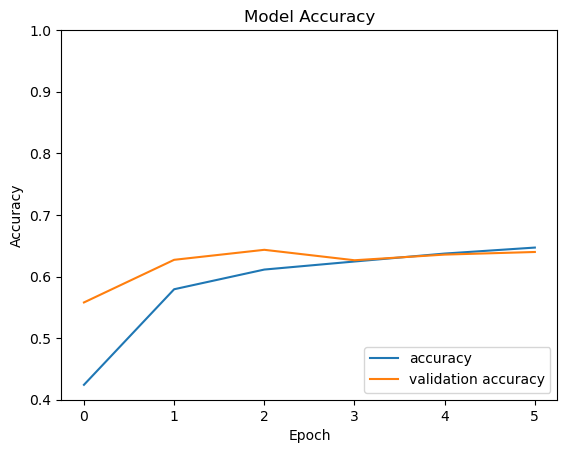

In [45]:
plt.plot(node_fit.history['accuracy'], label='accuracy')
plt.plot(node_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

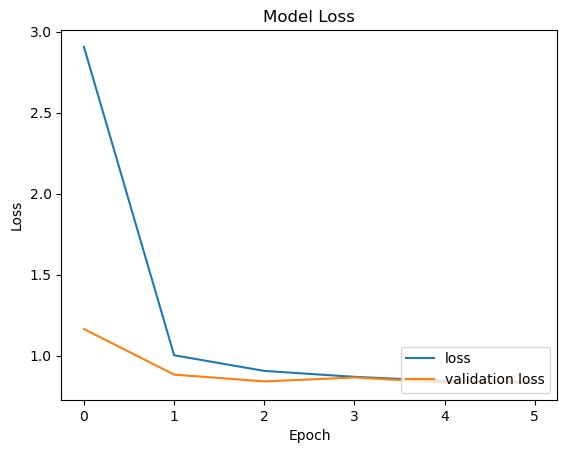

In [46]:
plt.plot(node_fit.history['loss'], label='loss')
plt.plot(node_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [47]:
new_predict4 = model4.predict(x_nodes_test)

45/45 [==============================] - 16s 358ms/step


In [48]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_nodes_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[  4 203   9   0]
 [  1 355  25   2]
 [  0 140 232  34]
 [  0  21  75 315]]


In [49]:
onemisclass = 1+140+75+203+25+34
twomisclass = 0+21+9+2
threemisclass =  0+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[478, 32, 0]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

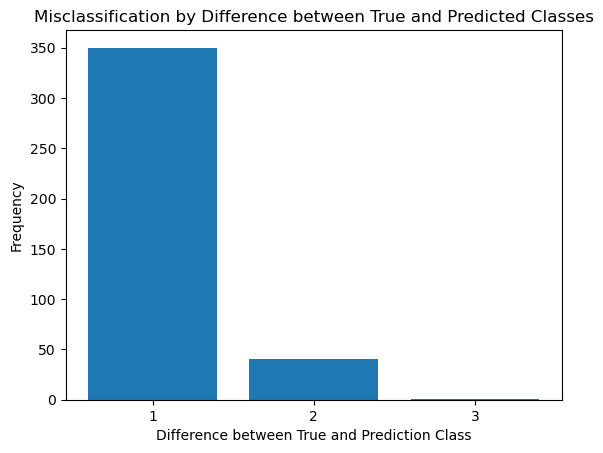

In [75]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\node4ClassModel")

# Combined Model

In [51]:
batch_size = 128
epochs = 6

model_chars_input = Input((496,154,1))

model_chars = Conv2D(32, kernel_size=(6, 6), strides=(2,2),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(64, (6, 6), strides=(2,2), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_chars)
model_chars = Dropout(0.25)(model_chars)
model_chars = Flatten()(model_chars)
model_chars = Dense(16, activation='relu')(model_chars)
model_chars = Dropout(0.5)(model_chars)

model_tokens_input = Input((496,154,1))

model_tokens = Conv2D(32, kernel_size=(6, 6), strides=(2,2),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(64, (6, 6), strides=(2,2), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_tokens)
model_tokens = Dropout(0.25)(model_tokens)
model_tokens = Flatten()(model_tokens)
model_tokens = Dense(16, activation='relu')(model_tokens)
model_tokens = Dropout(0.5)(model_tokens)

model_nodes_input = Input((496,154,1))

model_nodes = Conv2D(32, kernel_size=(9, 9), strides=(2,2),
                 activation='relu')(model_nodes_input)
model_nodes = Conv2D(64, (9, 9), strides=(2,2), activation='relu')(model_nodes)
model_nodes = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_nodes)
model_nodes = Dropout(0.25)(model_nodes)
model_nodes = Flatten()(model_nodes)
model_nodes = Dense(16, activation='relu')(model_nodes)
model_nodes = Dropout(0.5)(model_nodes)

merged = Concatenate()([model_chars, model_tokens, model_nodes])
merged = Dense(8, activation='relu')(merged)
merged = Dense(4, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input, model_nodes_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                            

In [52]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

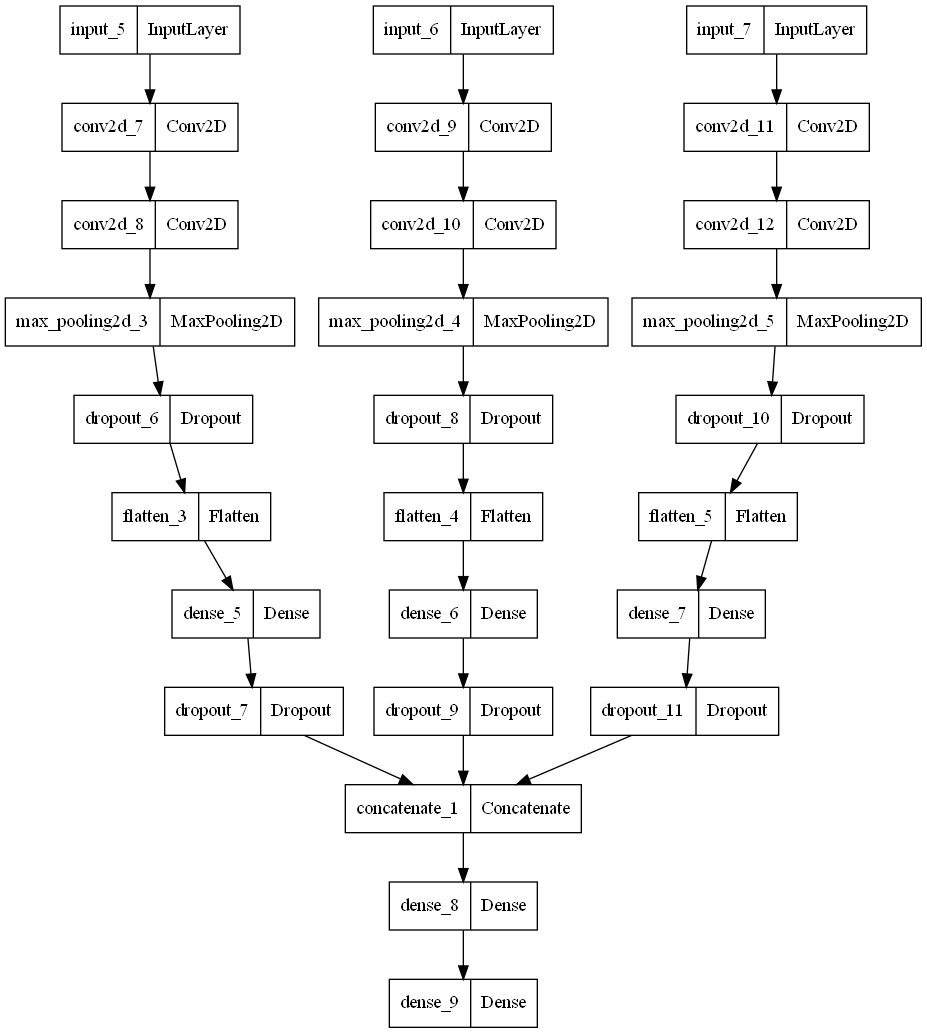

In [6]:
tf.keras.utils.plot_model(model_combined4)

In [53]:
combined4_fit = model_combined4.fit([x_characters_train, x_tokens_train, x_nodes_train], y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test, x_tokens_test, x_nodes_test], y_characters_test))
combined4_score = model_combined4.evaluate([x_characters_test, x_tokens_test, x_nodes_test], y_characters_test, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
45/45 [==============================] - 453s 10s/step - loss: 2.4593 - accuracy: 0.3155 - val_loss: 1.3422 - val_accuracy: 0.3030
Epoch 2/6
45/45 [==============================] - 447s 10s/step - loss: 1.2399 - accuracy: 0.3809 - val_loss: 1.1080 - val_accuracy: 0.4294
Epoch 3/6
45/45 [==============================] - 443s 10s/step - loss: 1.0837 - accuracy: 0.5237 - val_loss: 0.8588 - val_accuracy: 0.7076
Epoch 4/6
45/45 [==============================] - 450s 10s/step - loss: 0.9215 - accuracy: 0.6090 - val_loss: 0.8064 - val_accuracy: 0.6596
Epoch 5/6
45/45 [==============================] - 442s 10s/step - loss: 0.8743 - accuracy: 0.6239 - val_loss: 0.7498 - val_accuracy: 0.6928
Epoch 6/6
45/45 [==============================] - 445s 10s/step - loss: 0.8110 - accuracy: 0.6541 - val_loss: 0.7593 - val_accuracy: 0.6638
Test loss: 0.7593271136283875
Test accuracy: 0.6638417840003967


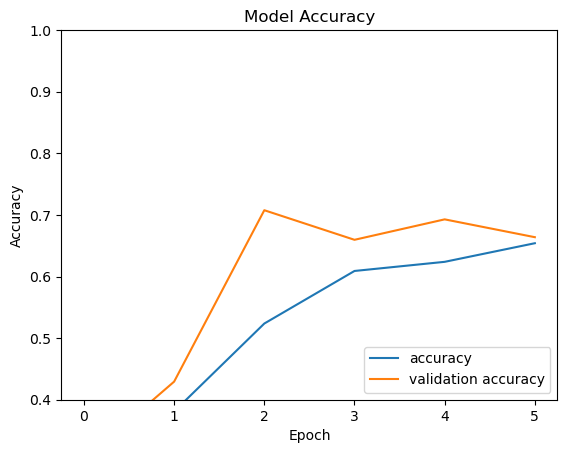

In [54]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

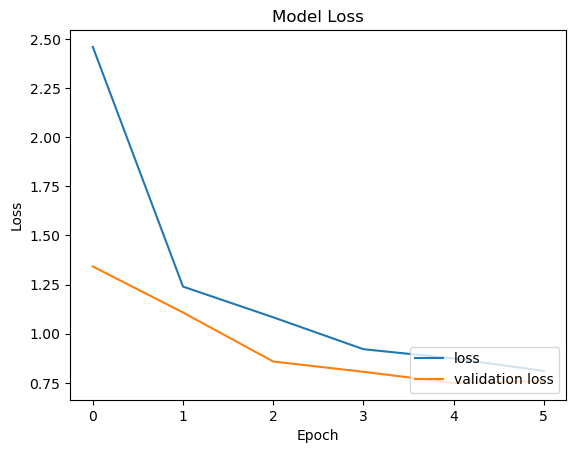

In [55]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [56]:
new_predict4 = model_combined4.predict([x_characters_test, x_tokens_test, x_nodes_test])

45/45 [==============================] - 29s 638ms/step


In [57]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[169  47   0   0]
 [ 40 343   0   0]
 [  3 265  92  46]
 [  1  46  28 336]]


In [58]:
onemisclass = 40+265+28+47+0+46
twomisclass = 3+46+0+0
threemisclass =  1+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[426, 49, 1]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

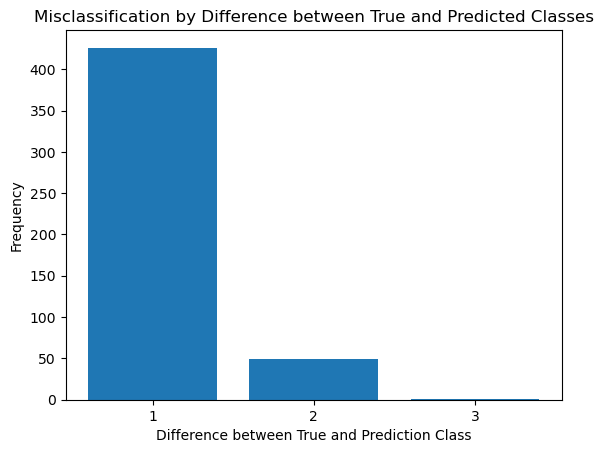

In [59]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model_combined4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\combined4ClassModel")